# Chart-Book-Neutron-Density-Porosity-using-KNN

The objective of this project is to calculate a Neutron log vs. Bulk Density log Cross-Plot Total porosity using, at this point, the Schlumberger CNL or TNPH Charts as shown below. It is important to use the proper Neutron log associated with the appropriate chart for either fresh or saline fluid densities as specified. The Neutron logs should also be on limestone matrix with these charts. 

![CNL_Image](CNL.png)

![TNPH_Image](TNPH.png)

The name of the Python code is NeutDen_chartbook_porosity_knn_testresults.py. This program uses as training data a matrix of Neutron Porosity (V/V) vs. Bulk Density (G/CC) with known porosities (see below). In this example we are using test data as our log data to observe how well the program is actually working. We have very good agreement between our log analysis chart book training values and the values estimated from this program. 

The porosity estimations are made using KNN. Before we begin any distance calculations, we first normalize the Neutron porosity and Bulk Density curves and then use a KNN of 3 to estimate our Cross-Plot porosity values from our test data set.   

![SMatrixCNL_Image](Matrix_CNL2.png)

![SMatrixTNPH_Image](Matrix_TNPH.png)

This program has been tested for the charts available so far showing good agreement with the training data for our calculated porosities. Further testing is recommended before using this program to better understand the uncertainties in the estimations and validate using a KNN of 3. Please provide feedback if you have any issues.

We are using CNL_1pt1_testdata.xls as log data for testing purposes, but you could use your own log data in lieu of this file to calculate Neutron-Density Total Cross-Plot porosities for your analysis.

We have 4 sets of data files representing 4 of the Schlumberger charts; 2 fluid densities for CNL and 2 for TNPH. Other vendor charts will also be included as needed in the future. 

Constructive criticism and any collaboration are both welcome. 


### Code:

###### Load dependencies

In [1]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a script file.
"""
import math
import matplotlib.pyplot as plt
import xlrd
import numpy as np


###### Read In Digitized Chartbook Data using the appropriate chart

In [2]:
"""
# =============================================================================
# # ======================================================================= # #
# # # 
# # #      Read in Digitized Chartbook data stored in Excel spreadsheet   # # #
# # #
# # ======================================================================= # #
# =============================================================================
"""

#book = xlrd.open_workbook("CNL_1pt0.xls") 
book = xlrd.open_workbook("CNL_1pt1.xls") 
#book = xlrd.open_workbook("TNPH_1pt0.xls") 
#book = xlrd.open_workbook("TNPHL_1pt1.xls") 

#Fluid Density
FD = 1.1

sh = book.sheet_by_index(0)
print(sh.name, sh.nrows, sh.ncols)
print()

rows_chart_data = sh.nrows

import win32com.client

o = win32com.client.Dispatch("Excel.Application")
o.Visible = 1
o.Workbooks.Add()


CNL_chart  = []
RHOB_chart = []
Rho_Matrix_chart  = []
Porosity_chart = []




for i in range(0, rows_chart_data, 1):
    CNL_chart.append(sh.cell_value(rowx=i, colx=0))
    RHOB_chart.append(sh.cell_value(rowx=i, colx=1))
    Rho_Matrix_chart.append(sh.cell_value(rowx=i, colx=2))
    Porosity_chart.append(sh.cell_value(rowx=i, colx=3))






SLB_CNL_1.1 163 4



###### Read In log data. This is actually test data that was used to QC the results.

In [3]:
"""
# =============================================================================
# # ===========================================================================
# # #           
# # #            Read in log data
# # #                   
# # ===========================================================================
# =============================================================================
"""
book = xlrd.open_workbook("CNL_1pt1_testdata.xls")  #  log data
#book = xlrd.open_workbook("GulfCoast_NeutDen.xls")  #  log data
sh = book.sheet_by_index(0)
print(sh.name, sh.nrows, sh.ncols)

import win32com.client

o = win32com.client.Dispatch("Excel.Application")
# o.Visible = 1
# o.Workbooks.Add() 

rows_log_data = sh.nrows

Dep = []
RHOB = []
CNL = []


print(rows_log_data)

for i in range(0, rows_log_data, 1):
    Dep.append(sh.cell_value(rowx=i, colx=0))
    CNL.append(sh.cell_value(rowx=i, colx=1))    
    RHOB.append(sh.cell_value(rowx=i, colx=2))


Sheet1 163 5
163


###### KNN to estimate Cross Plot porosity from the appropriate chart

In [4]:
"""
# =============================================================================
# # ===========================================================================
# # #--------------------------------------------------------------------------
# ##
# ##            This is the beginnin of KNN estimating ND xplt Porosity 
# ##
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================
"""  
deptharray = []
porarray   = []; #make list of 0 length


#log Data
for k in range(0,rows_log_data ,1):  

        cnl = (CNL[k]-(-0.05))/(0.6-(-0.05))
        rhob = (RHOB[k]-1.9)/(3-1.9)
        


        dist_inv    = []
        dist_cnl    = []
        dist_rhob    = []
        inv_dist_array = []
        Por_weight = []
        CNL_norm = []
        RHOB_norm = []

        dist_inv_total = 0
        Por_total     = 0






        #this is the chartbook_reference_data being used 
        for i in range(0,rows_chart_data,1):
        
                CNL_norm.append((CNL_chart[i] - (-0.05)) / (0.6 - (-0.05)))
                RHOB_norm.append((RHOB_chart[i] - 1.9) / (3.0 - 1.9))
                
                #Euclidian Distance
                dist_cnl.append((abs(cnl - CNL_norm[i])))
                dist_rhob.append( abs(rhob - RHOB_norm[i]))

                if math.sqrt(dist_cnl[i]**2 + dist_rhob[i]**2) > 0:
                    dist_inv.append( 1  /  math.sqrt( dist_cnl[i]**2 + dist_rhob[i]**2)  )
                else:
                    dist_inv.append( 1  /  math.sqrt( 0.0001 + dist_cnl[i]**2 + dist_rhob[i]**2)  )
        
                
                #calculalte weights
                Por_weight.append(dist_inv[i]  * Porosity_chart[i])
                
        
                inv_dist_array.append(dist_inv[i]);  # add items
        
        # =============================================================================
        ###                    KNN Array
        # # ===========================================================================
        # # #--------------------------------------------------------------------------
                distance_knn_array = [dist_inv, Por_weight]
        #        distance_knn_array = [Permeability, Porosity, G1, PD1, BV1, G2, PD2, BV2]
        # # #--------------------------------------------------------------------------
        # # ===========================================================================
        # =============================================================================
        xnorm=np.array(CNL_norm)
        ynorm=np.array(RHOB_norm)
        
            
        #knn_array = np.transpose array
        knn_array = np.transpose(distance_knn_array)
        #print(knn_array)
        
        #Sort array from large to low by column 0 which is dist_inv 
        #xknn=np.array(knn_array)
        
        #matsor x[x[:,column].argsort()[::-1]] and -1 us reverse order
        mat_sort = knn_array[knn_array[:,0].argsort()[::-1]] #firt column reverse sort (-1)
        #mat_sort = x[x[:,1].argsort()[::-1]]
        #mat_sort = x[x[:,2].argsort()[::-1]]
        
         
        #------------------------------------------------------------------------------
        #    Number of nearest Neighbors
        #------------------------------------------------------------------------------
        n_neighbors = 3
        #------------------------------------------------------------------------------
        
        dist_inv_total_knn = 0
        por_total_knn = 0
        
        
        
        
        #kNN Estimates for first 3 rows
        #dist_inv_total = mat_sort[0][0] + mat_sort[1][0] + mat_sort[2][0]
        for i in range(0,n_neighbors,1):
            dist_inv_total_knn = dist_inv_total_knn + mat_sort[i][0]
            por_total_knn  = por_total_knn + mat_sort[i][1]
        
        
        #back to k values and calculate estimations now
        por_est_knn  = por_total_knn  / dist_inv_total_knn
        
        
#        print()
#        print(Fore.GREEN +'Estimated Porosity from KNN =',n_neighbors,' on normlalized log data')
#        print(Fore.GREEN + '     Por =',por_est_knn, ) 
#
        phixnd_chartbook = por_est_knn
        rhomatrix = (RHOB[k]-phixnd_chartbook*FD)/(1-phixnd_chartbook)


#------------------------------------------------------------------------------ 
#            Write Data to Spreadsheet
#------------------------------------------------------------------------------
        deptharray.append(Dep[k]); #add items 
        porarray.append(phixnd_chartbook); #add items 


   
#---------------------------------
#                Header
#---------------------------------
    
        o.Cells(2,1).Value = " Depth "    
        o.Cells(2,2).Value = " CNL "
        o.Cells(2,3).Value = " RHOB "            
        o.Cells(2,4).Value = " Phixnd_chartbook "   
        o.Cells(2,5).Value = " RhoMatrix "          
#----------------------------------
#                Data
#----------------------------------
        
        o.Cells(k+3,1).Value = Dep[k]
        o.Cells(k+3,2).Value = CNL[k]
        o.Cells(k+3,3).Value = RHOB[k]
        o.Cells(k+3,4).Value = phixnd_chartbook 
        o.Cells(k+3,5).Value = rhomatrix 




 

###### Make plots

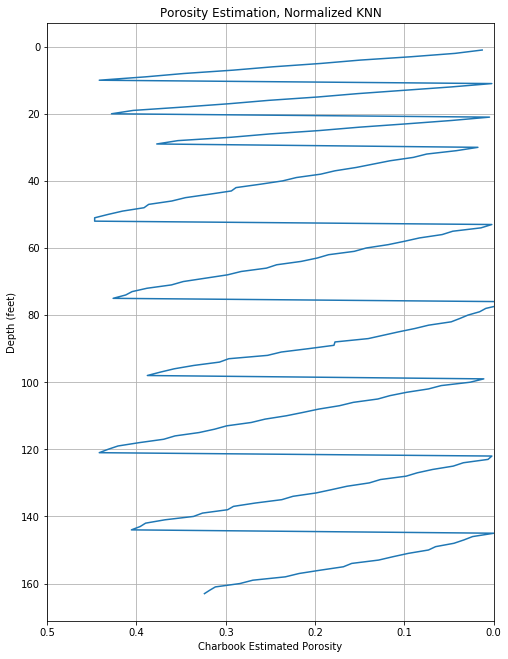

In [5]:
x=np.array(porarray)
y=np.array(deptharray)


plt.figure(figsize=(8,11))    
plt.plot(x, y)

plt.xlim(0.5, 0)


plt.gca().invert_yaxis()

plt.title("Porosity Estimation, Normalized KNN")
plt.ylabel('Depth (feet)')
plt.xlabel('Charbook Estimated Porosity')
plt.grid(True)


plt.show()